## Trump Model Training

In [39]:
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.utils import to_categorical
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adagrad, Adam
from tensorflow.keras import regularizers
import tensorflow as tf


In [40]:
## define paths to data files
path_to_train_data = Path("C:\\Users\\matth\\Documents\\DL4G\\jass-data\\split\\train\\filtered\\card\\csv")
path_to_test_data = Path("C:\\Users\\matth\\Documents\\DL4G\\jass-data\\split\\test\\filtered\\card\\csv")
path_to_val_data = Path("C:\\Users\\matth\\Documents\\DL4G\\jass-data\\split\\val\\filtered\\card\\csv")

In [41]:
# train data
data_train1 = pd.read_csv(path_to_train_data / '0001.csv', header=None)
data_train2 = pd.read_csv(path_to_train_data / '0002.csv', header=None)
data_train3 = pd.read_csv(path_to_train_data / '0003.csv', header=None)
data_train4 = pd.read_csv(path_to_train_data / '0004.csv', header=None)
data_val1 = pd.read_csv(path_to_val_data / '0001.csv', header=None)
data_val2 = pd.read_csv(path_to_val_data / '0002.csv', header=None)

data_train = pd.concat([data_train1, data_train2, data_train3, data_train4, data_val1, data_val2], axis=0)
data_train.shape
data_train.head()



#data_val = pd.concat([data_val1, data_val2], axis=0)

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,1,30
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,31
2,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,13
4,0,0,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,32


In [42]:
# test data
data_test1 = pd.read_csv(path_to_test_data / '0001.csv', header=None)
data_test2 = pd.read_csv(path_to_train_data / '0002.csv', header=None)

data_test = pd.concat([data_test1, data_test2])
data_test.shape
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,21
1,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,20
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,12
3,0,0,0,1,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,3
4,0,1,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,8


## Label data for readability

## Prepare x and y values

In [43]:
# colums used for extracting x and y values. The same effect could be achieved with train_test_split-Method, but 
# since we already have different files, we dont need to split the files using this method.
#data_X_columns = cards + forehand
#data_Y_colums = trump

x_train = data_train[data_train.columns[0:82]]
y_train = data_train[data_train.columns[82]]
print (x_train.head())
print (y_train.head())

x_test = data_test[data_test.columns[0:82]]
y_test = data_test[data_test.columns[82]]

#x_val = data_val[data_val.columns[0:82]]
#y_val = data_val[data_val.columns[82]]

   0   1   2   3   4   5   6   7   8   9   ...  72  73  74  75  76  77  78  \
0   0   0   0   0   0   1   0   1   0   0  ...   0   1   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   1   0   0   0   
2   0   1   0   0   0   0   0   0   1   0  ...   0   1   0   0   0   0   1   
3   0   0   0   0   0   0   0   0   0   0  ...   1   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   1  ...   0   1   0   0   1   0   0   

   79  80  81  
0   0   0   1  
1   0   1   0  
2   0   0   0  
3   0   1   0  
4   0   0   0  

[5 rows x 82 columns]
0    30
1    31
2     8
3    13
4    32
Name: 82, dtype: int64


## Create model and train it

In [44]:
# We have 37 features, so we have a node for each feature. There are 7 output categories: each trump color(4), 
# obe-abe, unde-ufe, schiebe. So we need an reducing function with 7 elements
model = keras.Sequential()
model.add(keras.layers.Dense(82, activation='relu', input_shape=[82]))
model.add(keras.layers.Dense(82, activation='relu'))
model.add(keras.layers.Dense(82, activation='relu'))
model.add(keras.layers.Dense(82, activation='relu'))
model.add(keras.layers.Dense(82, activation='relu'))
model.add(keras.layers.Dense(82, activation='relu'))
model.add(keras.layers.Dense(82, activation='relu'))
model.add(keras.layers.Dense(82, activation='relu'))
model.add(keras.layers.Dense(82, activation='relu'))
model.add(keras.layers.Dense(36, activation='softmax'))

opt = Adam()

model.compile(loss='categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['accuracy'])

print(model.summary())


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 82)                6806      
_________________________________________________________________
dense_38 (Dense)             (None, 82)                6806      
_________________________________________________________________
dense_39 (Dense)             (None, 82)                6806      
_________________________________________________________________
dense_40 (Dense)             (None, 82)                6806      
_________________________________________________________________
dense_41 (Dense)             (None, 82)                6806      
_________________________________________________________________
dense_42 (Dense)             (None, 82)                6806      
_________________________________________________________________
dense_43 (Dense)             (None, 82)               

In [45]:
y_train_categorical = to_categorical(y_train)

history = model.fit(x_train, y_train_categorical, epochs=200, batch_size=100)

Train on 510165 samples
Epoch 1/200
510165/510165 [==============================] - 25s 49us/sample - loss: 3.5753 - accuracy: 0.0439
Epoch 2/200
510165/510165 [==============================] - 21s 41us/sample - loss: 3.3262 - accuracy: 0.0996
Epoch 3/200
510165/510165 [==============================] - 21s 42us/sample - loss: 2.6739 - accuracy: 0.2412
Epoch 4/200
510165/510165 [==============================] - 20s 40us/sample - loss: 2.2192 - accuracy: 0.3368
Epoch 5/200
510165/510165 [==============================] - 20s 39us/sample - loss: 1.9804 - accuracy: 0.3910
Epoch 6/200
510165/510165 [==============================] - 20s 38us/sample - loss: 1.8249 - accuracy: 0.4308
Epoch 7/200
510165/510165 [==============================] - 20s 38us/sample - loss: 1.7117 - accuracy: 0.4636
Epoch 8/200
510165/510165 [==============================] - 20s 38us/sample - loss: 1.6244 - accuracy: 0.4870
Epoch 9/200
510165/510165 [==============================] - 20s 38us/sample - loss: 1.5

510165/510165 [==============================] - 19s 38us/sample - loss: 0.9203 - accuracy: 0.6402
Epoch 73/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.9187 - accuracy: 0.6401
Epoch 74/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.9168 - accuracy: 0.6416
Epoch 75/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.9148 - accuracy: 0.6419
Epoch 76/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.9132 - accuracy: 0.6413
Epoch 77/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.9109 - accuracy: 0.6430
Epoch 78/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.9092 - accuracy: 0.6422
Epoch 79/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.9077 - accuracy: 0.6439
Epoch 80/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.9061 - accuracy: 0.6440
Epoch

510165/510165 [==============================] - 19s 38us/sample - loss: 0.8367 - accuracy: 0.6633
Epoch 145/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.8356 - accuracy: 0.6637
Epoch 146/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.8340 - accuracy: 0.6643
Epoch 147/200
510165/510165 [==============================] - 20s 39us/sample - loss: 0.8337 - accuracy: 0.6641
Epoch 148/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.8331 - accuracy: 0.6647
Epoch 149/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.8322 - accuracy: 0.6651
Epoch 150/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.8318 - accuracy: 0.6648
Epoch 151/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.8311 - accuracy: 0.6646
Epoch 152/200
510165/510165 [==============================] - 19s 38us/sample - loss: 0.8304 - accuracy: 0.66

## Generate graphs for loss and accuracy

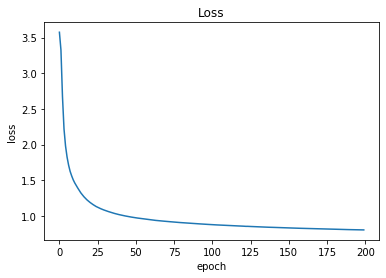

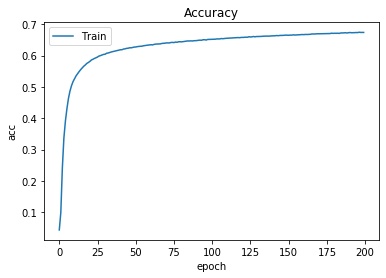

In [46]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train'], loc='upper left')

## Test model

In [47]:
y_test_categorical = to_categorical(y_test)
model.evaluate(x_test, y_test_categorical)

200000/200000 [==============================] - 7s 33us/sample - loss: 0.8885 - accuracy: 0.6498


[0.888544743771553, 0.649795]

In [48]:
model.save("card_model_e200_sgd_.h5")

In [49]:
print(model.predict(x_test))

[[1.8732414e-04 7.8758776e-06 5.5488306e-07 ... 6.0292223e-04
  1.4928181e-05 4.2337756e-06]
 [2.0469888e-06 4.8348625e-06 2.2800318e-06 ... 3.8861312e-05
  3.2904772e-08 2.0267501e-06]
 [6.4537839e-05 4.0438140e-06 2.4189045e-05 ... 3.2235406e-05
  2.5888232e-06 1.7148423e-06]
 ...
 [2.0263403e-07 1.7779010e-06 1.8933213e-07 ... 7.2411282e-08
  3.1788080e-08 1.8802955e-07]
 [1.8083171e-07 1.4765958e-08 1.6316861e-08 ... 8.9889809e-06
  2.4509768e-06 5.7616226e-06]
 [1.0688141e-04 9.6985819e-03 4.8314403e-05 ... 2.1106536e-05
  2.5100275e-03 1.8419135e-01]]
